In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\Toshiba\\Desktop\\Yazılım\\Python\\acme\\term-deposit-marketing-2020.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

# Data Preprocessing

## Unknown variables

We should convert "unknown" value to Null value and make data imputation.

In [6]:
list(data.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'y']

In [7]:
for key, value in data.iteritems(): 
    if('unknown' in value.unique()):
        print(key)

job
education
contact


C:\Users\Toshiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [8]:
item_counts = data["job"].value_counts(normalize=True)
print(item_counts*100)

blue-collar      23.4575
management       20.4150
technician       17.1300
admin            11.2075
services          9.7750
retired           3.5925
self-employed     3.5350
entrepreneur      3.5125
unemployed        2.7600
housemaid         2.7175
student           1.3100
unknown           0.5875
Name: job, dtype: float64


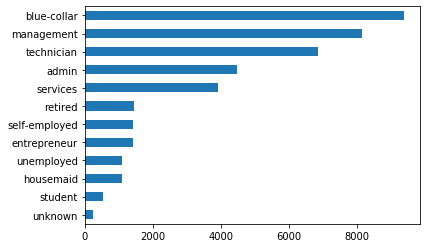

In [9]:
data.job.value_counts().sort_values().plot(kind = 'barh')

In [10]:
item_counts = data["education"].value_counts(normalize=True)
print(item_counts*100)

secondary    52.4825
tertiary     28.0150
primary      15.6750
unknown       3.8275
Name: education, dtype: float64


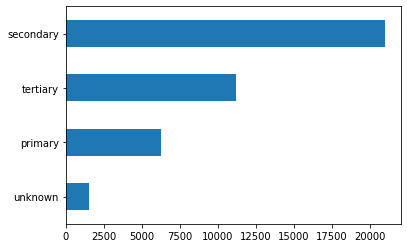

In [11]:
data.education.value_counts().sort_values().plot(kind = 'barh')

In [12]:
item_counts = data["contact"].value_counts(normalize=True)
print(item_counts*100)

cellular     62.2850
unknown      31.9125
telephone     5.8025
Name: contact, dtype: float64


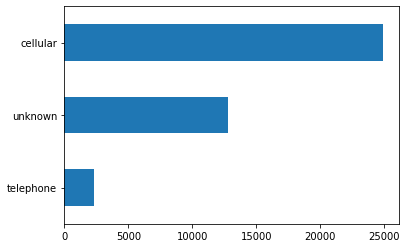

In [13]:
data.contact.value_counts().sort_values().plot(kind = 'barh')

In [14]:
data.shape[1], data.drop(['contact'], axis='columns').shape[1]

(14, 13)

In [15]:
#One Hot Encoder Function for Categorical Variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Encoding Function for Categorical variables 
def encoding(i):
    X = data.iloc[:,i:i+1].values
    le = LabelEncoder()
    X[:,0] = le.fit_transform(data.iloc[:,i])
    ct = ColumnTransformer([(str(i), OneHotEncoder(), [0])], remainder = 'passthrough')
    X = ct.fit_transform(X)
    return X

In [16]:
contact = encoding(8)

In [17]:
contact[39985]

array([0., 1., 0.])

In [18]:
contact = pd.DataFrame(data=contact, index = range(40000), columns = ['contact_cellular', 'contact_telephone', 'contact_unknown'])

In [19]:
data = pd.concat([data, contact],axis = 1)

In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,contact_cellular,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,0.0,0.0,1.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,0.0,0.0,1.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,0.0,0.0,1.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,0.0,0.0,1.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,0.0,0.0,1.0


In [21]:
y = encoding(13)

In [22]:
y = pd.DataFrame(data=y, index = range(40000), columns = ['no', 'yes'])

In [23]:
data = pd.concat([data, y],axis = 1)

In [24]:
del data['no'] #dummy 

In [25]:
del data['y']

In [26]:
data.rename(columns={'yes': 'y'}, inplace=True)

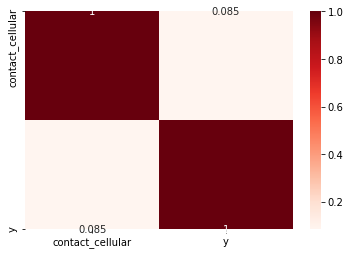

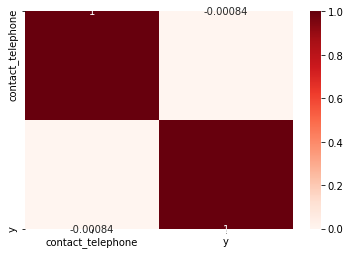

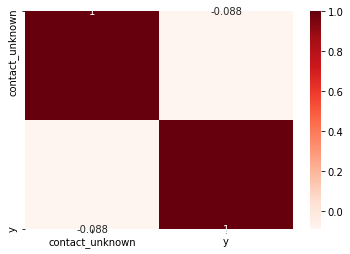

In [27]:
cols = [c for c in data.columns if c.startswith('contact_')]
for col in cols:
    filter_df = data[[col, 'y']]
    #print(filter_df.corr())
    sns.heatmap(filter_df.corr(), annot=True, cmap=plt.cm.Reds)
    plt.show()

There are weak correlation (< 0.5) between contact and our target column (y). So i decided to drop contact column. 

In [28]:
data.drop(data.loc[:, 'contact_cellular':'contact_unknown'].columns, axis = 1, inplace = True)

Job ve education kolonlarında unknown value sayısı az olduğu için o satırları sileceğiz. 

In [29]:
# I should replace unknown with nan values for data imputation
data.replace(r'unknown', np.nan, regex=True, inplace = True)

In [30]:
data.dropna(axis=0, subset=['job'], inplace = True)
data.dropna(axis=0, subset=['education'], inplace = True)

In [31]:
del data['contact']

In [32]:
#I should reset index
data.reset_index(drop=True, inplace=True)

In [33]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y
38333,53,technician,married,tertiary,no,395,no,no,3,jun,107,1,0.0
38334,30,management,single,tertiary,no,3340,no,no,3,jun,238,3,1.0
38335,54,admin,divorced,secondary,no,200,no,no,3,jun,170,1,1.0
38336,34,management,married,tertiary,no,1047,no,no,3,jun,342,1,0.0
38337,38,technician,married,secondary,no,1442,yes,no,3,jun,113,1,0.0


In [34]:
data.info() #There is no nan value left in its final version.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38338 entries, 0 to 38337
Data columns (total 13 columns):
age          38338 non-null int64
job          38338 non-null object
marital      38338 non-null object
education    38338 non-null object
default      38338 non-null object
balance      38338 non-null int64
housing      38338 non-null object
loan         38338 non-null object
day          38338 non-null int64
month        38338 non-null object
duration     38338 non-null int64
campaign     38338 non-null int64
y            38338 non-null float64
dtypes: float64(1), int64(5), object(7)
memory usage: 3.8+ MB


## Categorical variables

In [35]:
marital = encoding(2)
marital

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [36]:
#numpy array to dataframe
marital = pd.DataFrame(data=marital, index = range(len(data.index)), columns = ['marital_divorced', 'marital_married', 'marital_single'])

In [37]:
#dataframe concatenation
data = pd.concat([data, marital],axis = 1)
data.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single
38333,53,technician,married,tertiary,no,395,no,no,3,jun,107,1,0.0,0.0,1.0,0.0
38334,30,management,single,tertiary,no,3340,no,no,3,jun,238,3,1.0,0.0,0.0,1.0
38335,54,admin,divorced,secondary,no,200,no,no,3,jun,170,1,1.0,1.0,0.0,0.0
38336,34,management,married,tertiary,no,1047,no,no,3,jun,342,1,0.0,0.0,1.0,0.0
38337,38,technician,married,secondary,no,1442,yes,no,3,jun,113,1,0.0,0.0,1.0,0.0


In [38]:
del data['marital']

In [39]:
data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,0.0,0.0,1.0,0.0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,0.0,0.0,0.0,1.0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,0.0,0.0,1.0,0.0
3,35,management,tertiary,no,231,yes,no,5,may,139,1,0.0,0.0,1.0,0.0
4,28,management,tertiary,no,447,yes,yes,5,may,217,1,0.0,0.0,0.0,1.0


In [40]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [41]:
# Response Encoding for job Column

In [42]:
def get_gv_fea_dict(alpha, feature, df):
    
    value_count = df[feature].value_counts()
    gv_dict = dict()

    for i, denominator in value_count.items():
        vec = []
        for k in range(1,3):
            cls_cnt = df.loc[(df['y']==k) & (df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
        gv_dict[i]=vec
    return gv_dict

In [43]:
def get_gv_feature(alpha,feature, df):
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = df[feature].value_counts()    
    gv_fea = []
    
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

In [44]:
job_responseCoding = pd.DataFrame(get_gv_fea_dict(0.5, "job",data))
#Currently i have probabilities on each job relative to yes / no.
job_responseCoding

,blue-collar,management,technician,admin,services,self-employed,retired,entrepreneur,unemployed,housemaid,student
0,0.057181,0.083146,0.074368,0.079909,0.060733,0.080532,0.106114,0.063227,0.088000,0.051282,0.159596
1,0.000556,0.000623,0.000748,0.001142,0.001309,0.003501,0.003514,0.003634,0.004444,0.004579,0.010101


In [45]:
for index, row in data.iterrows():
     data.loc[index,'job'] = job_responseCoding.loc[row['y'],row['job']]

In [46]:
data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single
0,58,0.0831463,tertiary,no,2143,yes,no,5,may,261,1,0.0,0.0,1.0,0.0
1,44,0.0743678,secondary,no,29,yes,no,5,may,151,1,0.0,0.0,0.0,1.0
2,33,0.0632267,secondary,no,2,yes,yes,5,may,76,1,0.0,0.0,1.0,0.0
3,35,0.0831463,tertiary,no,231,yes,no,5,may,139,1,0.0,0.0,1.0,0.0
4,28,0.0831463,tertiary,no,447,yes,yes,5,may,217,1,0.0,0.0,0.0,1.0


In [47]:
# Response encoding for month column
month_responseCoding = pd.DataFrame(get_gv_fea_dict(0.5, "month",data))
month_responseCoding

,may,jul,aug,jun,nov,apr,feb,jan,mar,oct,dec
0,0.059068,0.060262,0.056109,0.064719,0.062200,0.162041,0.111556,0.034632,0.447917,0.434426,0.103448
1,0.000384,0.000810,0.000978,0.001124,0.001414,0.001875,0.002222,0.004329,0.017361,0.040984,0.086207


In [48]:
for index, row in data.iterrows():
     data.loc[index,'month'] = month_responseCoding.loc[row['y'],row['month']]

In [49]:
data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single
0,58,0.0831463,tertiary,no,2143,yes,no,5,0.0590675,261,1,0.0,0.0,1.0,0.0
1,44,0.0743678,secondary,no,29,yes,no,5,0.0590675,151,1,0.0,0.0,0.0,1.0
2,33,0.0632267,secondary,no,2,yes,yes,5,0.0590675,76,1,0.0,0.0,1.0,0.0
3,35,0.0831463,tertiary,no,231,yes,no,5,0.0590675,139,1,0.0,0.0,1.0,0.0
4,28,0.0831463,tertiary,no,447,yes,yes,5,0.0590675,217,1,0.0,0.0,0.0,1.0


In [50]:
# One Hot Encoding for education column
education = encoding(2)

In [51]:
education

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [52]:
education = pd.DataFrame(data=education, index = range(len(data.index)), columns = ['education_primary', 'education_secondary', 'education_tertiary'])

In [53]:
#dataframe concatenation
data = pd.concat([data, education],axis = 1)
data.tail()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
38333,53,0.0743678,tertiary,no,395,no,no,3,0.0647191,107,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
38334,30,0.000623286,tertiary,no,3340,no,no,3,0.0011236,238,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
38335,54,0.00114155,secondary,no,200,no,no,3,0.0011236,170,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0
38336,34,0.0831463,tertiary,no,1047,no,no,3,0.0647191,342,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
38337,38,0.0743678,secondary,no,1442,yes,no,3,0.0647191,113,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
del data['education']

In [55]:
data.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0.0831463,no,2143,yes,no,5,0.0590675,261,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,0.0743678,no,29,yes,no,5,0.0590675,151,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,0.0632267,no,2,yes,yes,5,0.0590675,76,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,35,0.0831463,no,231,yes,no,5,0.0590675,139,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,0.0831463,no,447,yes,yes,5,0.0590675,217,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
# Label Encoding for default column
item_counts = data["default"].value_counts(normalize=True)
print(item_counts*100)

no     97.975899
yes     2.024101
Name: default, dtype: float64


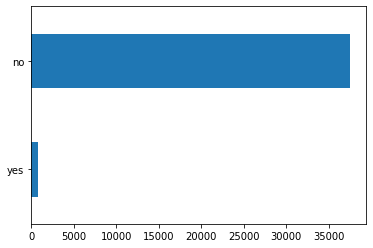

In [57]:
data.default.value_counts().sort_values().plot(kind = 'barh')

In [58]:
# Label Encoding for default column
item_counts = data["y"].value_counts(normalize=True)
print(item_counts*100)

0.0    92.717408
1.0     7.282592
Name: y, dtype: float64


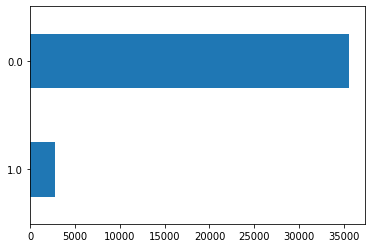

In [59]:
data.y.value_counts().sort_values().plot(kind = 'barh')

In [60]:
default = data.iloc[:,2:3].values
le = LabelEncoder()
default[:,0] = le.fit_transform(data.iloc[:,2])

In [61]:
data['default'] = default[:,0]

In [62]:
data['default'] = data['default'].astype(float, inplace = True)

In [63]:
data.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0.0831463,0.0,2143,yes,no,5,0.0590675,261,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,0.0743678,0.0,29,yes,no,5,0.0590675,151,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,0.0632267,0.0,2,yes,yes,5,0.0590675,76,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,35,0.0831463,0.0,231,yes,no,5,0.0590675,139,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,0.0831463,0.0,447,yes,yes,5,0.0590675,217,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [64]:
data['balance'] = data['balance'].astype(int, inplace = True)
data['default'] = data['default'].astype(int, inplace = True)

### Prediction with only default column to testing their correlations

In [65]:

x = data.iloc[:,2:3] #bağımsız değişkenler
y = data.iloc[:,10:11].values #bağımlı değişken
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [66]:
x = x.to_numpy()
x

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [67]:
#dividing data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)


In [68]:
#data scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
print(y_pred)
print(y_test)

[0. 0. 0. ... 0. 0. 0.]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[11745     0]
 [  907     0]]


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
accuracy_score(y_test, y_pred)*100

92.83117293708504

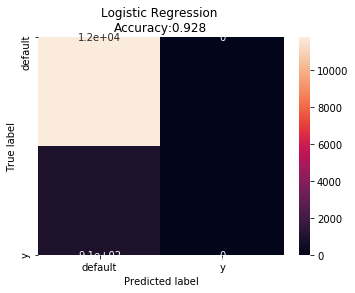

In [71]:
# Transform to df for easier plotting

cm_df = pd.DataFrame(cm,
                     index = ['default','y'], 
                     columns = ['default','y'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

This is a bad result. There is no true correlation between default and target. True Negative value is 0 in confusion matrix. It shows that specifity of the prediction is too low. 

### Continue with Categorical Variables

In [72]:
# Label Encoding for housing column
item_counts = data["housing"].value_counts(normalize=True)
print(item_counts*100)

yes    60.590015
no     39.409985
Name: housing, dtype: float64


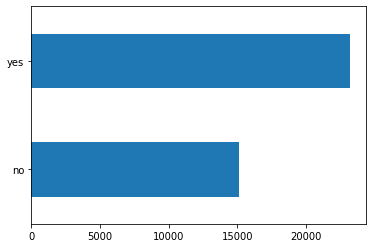

In [73]:
data.housing.value_counts().sort_values().plot(kind = 'barh')

In [74]:
housing = data.iloc[:,4:5].values
le = LabelEncoder()
housing[:,0] = le.fit_transform(data.iloc[:,2])

In [75]:
data['housing'] = housing[:,0]
data['housing'] = data['housing'].astype(int, inplace = True)
data.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0.0831463,0,2143,0,no,5,0.0590675,261,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,0.0743678,0,29,0,no,5,0.0590675,151,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,0.0632267,0,2,0,yes,5,0.0590675,76,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,35,0.0831463,0,231,0,no,5,0.0590675,139,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,0.0831463,0,447,0,yes,5,0.0590675,217,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


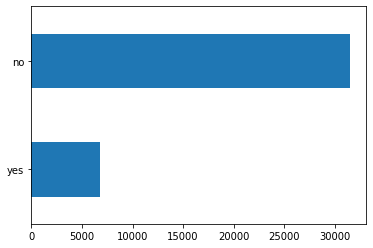

In [76]:
data.loan.value_counts().sort_values().plot(kind = 'barh')

In [77]:
#Label Encoding for Loan column
loan = data.iloc[:,4:5].values
le = LabelEncoder()
loan[:,0] = le.fit_transform(data.iloc[:,2])
data['loan'] = loan[:,0]
data['loan'] = data['loan'].astype(int, inplace = True)
data.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0.0831463,0,2143,0,0,5,0.0590675,261,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,0.0743678,0,29,0,0,5,0.0590675,151,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,0.0632267,0,2,0,0,5,0.0590675,76,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,35,0.0831463,0,231,0,0,5,0.0590675,139,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,0.0831463,0,447,0,0,5,0.0590675,217,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Correlations

### Correlation matrix of converted numerical data

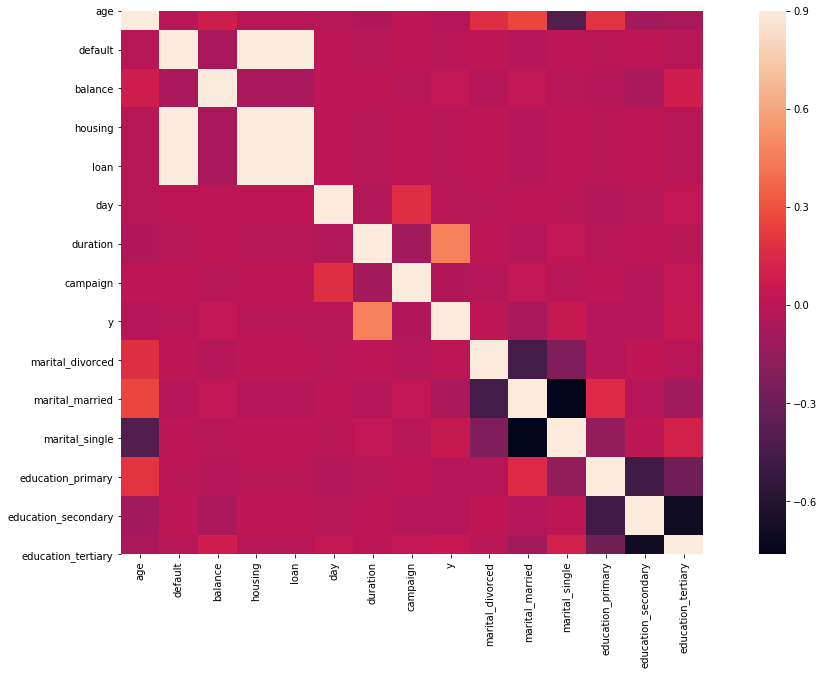

In [78]:
corrmat = data.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True)

### Checkin correlations between housing and loan

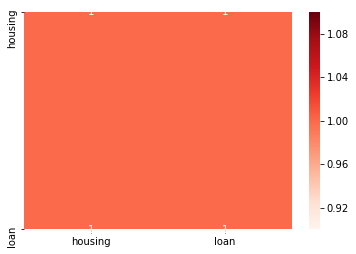

In [79]:
cols = [c for c in data.columns if c.startswith('housing')]
for col in cols:
    filter_df = data[[col, 'loan']]
    #print(filter_df.corr())
    sns.heatmap(filter_df.corr(), annot=True, cmap=plt.cm.Reds)
    plt.show()

Yes they are fully correlated with each other. I am going to drop loan column. 

In [80]:
del data["loan"]

In [81]:
data.head()

,age,job,default,balance,housing,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0.0831463,0,2143,0,5,0.0590675,261,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,0.0743678,0,29,0,5,0.0590675,151,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,0.0632267,0,2,0,5,0.0590675,76,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,35,0.0831463,0,231,0,5,0.0590675,139,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,0.0831463,0,447,0,5,0.0590675,217,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Checking correlations between housing and default

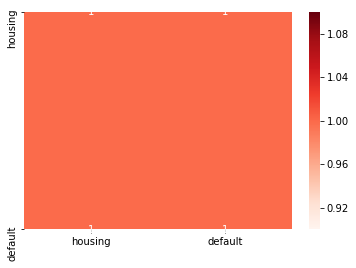

In [82]:
cols = [c for c in data.columns if c.startswith('housing')]
for col in cols:
    filter_df = data[[col, 'default']]
    #print(filter_df.corr())
    sns.heatmap(filter_df.corr(), annot=True, cmap=plt.cm.Reds)
    plt.show()

Yes they are fully correlated with each other. I am going to drop default column.

In [83]:
del data["default"]

In [84]:
data.head()

,age,job,balance,housing,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0.0831463,2143,0,5,0.0590675,261,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,0.0743678,29,0,5,0.0590675,151,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,0.0632267,2,0,5,0.0590675,76,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,35,0.0831463,231,0,5,0.0590675,139,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,0.0831463,447,0,5,0.0590675,217,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


There are no fully correlated columns to drop. Besides, most correlated column with y is duration column.

Before classification of the data, the imbalanced data problem must be solved. 

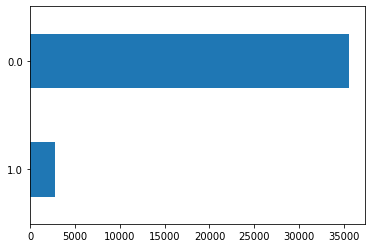

In [85]:
data.y.value_counts().sort_values().plot(kind = 'barh')  # 0 -> no, 1 -> yes

# Random Oversampling & Undersampling

In [86]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [87]:
x = data.loc[:, data.columns != 'y'].values

In [88]:
y = data.y

In [89]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(x, y)
# new class distribution 
print(Counter(y_ros))

Counter({0.0: 35546, 1.0: 35546})


The random oversampling may increase the likelihood of overfitting occurring, since it makes exact copies of the minority class examples. So, I decided to combine with undersampling 

## Combined Random Oversampling and Undersampling

In [90]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(x, y)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0.0: 35546, 1.0: 17773})
Combined Random Sampling: Counter({0.0: 22216, 1.0: 17773})


# Machine Learning - Model Evaluation

## Train Test Splitting of Data

In [105]:
x_train, x_test,y_train,y_test = train_test_split(X_combined_sampling,y_combined_sampling,test_size=0.33, random_state=0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

## Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)

### 5-Fold Cross Validation for Logistic Regression

In [96]:
scores_accuracy = cross_val_score(logr, X_combined_sampling, y_combined_sampling, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(logr, X_combined_sampling, y_combined_sampling, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(logr, X_combined_sampling, y_combined_sampling, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logr.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean()*100)
print(logr.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logr.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

K-fold cross-validation results:
LogisticRegression average accuracy is 0.802
LogisticRegression average log_loss is 0.447
LogisticRegression average auc is 0.877


C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### ROC curve, sensivity and spesicifity for Logistic Regression

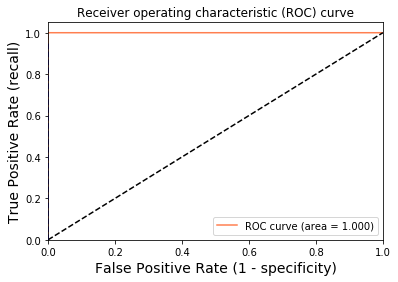

Using a threshold of 0.999 guarantees a sensitivity of 0.951 and a specificity of 1.000, i.e. a false positive rate of 0.00%.


In [118]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
y_pred_proba = logr.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = rclf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

13197
1.0
1.0
[[7378    0]
 [   0 5819]]


### 5-Fold Cross Validation for Random Forest Classifier

In [109]:
scores_accuracy = cross_val_score(rclf, x, y, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(rclf, x, y, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(rclf, x, y, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(rclf.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(rclf.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(rclf.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())    

K-fold cross-validation results:
RandomForestClassifier average accuracy is 0.979
RandomForestClassifier average log_loss is 0.017
RandomForestClassifier average auc is 1.000


### ROC curve, sensivity and spesicifity for Random Forest Classifier

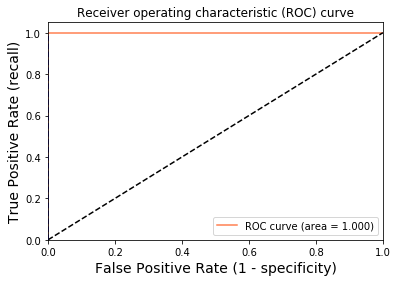

Using a threshold of 1.000 guarantees a sensitivity of 0.985 and a specificity of 1.000, i.e. a false positive rate of 0.00%.


In [117]:
y_pred_proba = rclf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))